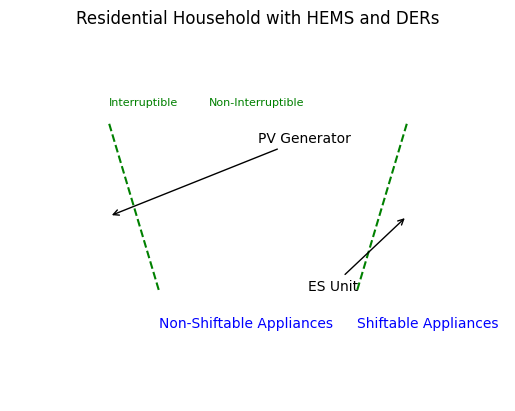

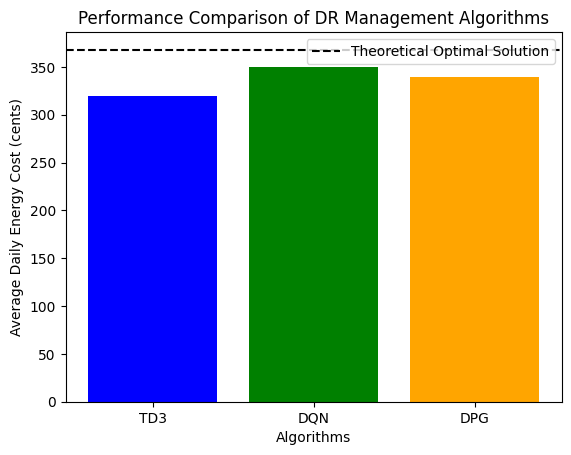

Battery SOC: 30.00 kWh
Renewable Generation: 30.00 kWh
Energy Demand: 0.00 kWh
Battery SOC: 60.00 kWh
Renewable Generation: 0.00 kWh
Energy Demand: 0.00 kWh
Battery SOC: 60.00 kWh
Renewable Generation: 0.00 kWh
Energy Demand: 0.00 kWh
Battery SOC: 60.00 kWh
Renewable Generation: 0.00 kWh
Energy Demand: 0.00 kWh
Battery SOC: 60.00 kWh
Renewable Generation: 0.00 kWh
Energy Demand: 0.00 kWh
Battery SOC: 60.00 kWh
Renewable Generation: 0.00 kWh
Energy Demand: 0.00 kWh
Battery SOC: 60.00 kWh
Renewable Generation: 0.00 kWh
Energy Demand: 0.00 kWh


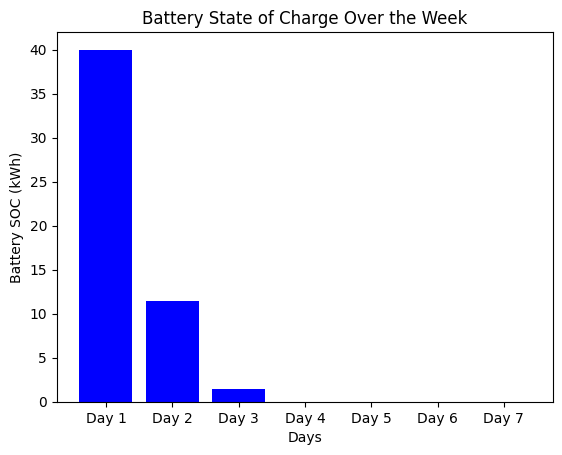

In [1]:
# Appendix-A
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots()

# Draw the PV generator and ES unit
ax.annotate("PV Generator", xy=(0.2, 0.5), xytext=(0.5, 0.7),
            arrowprops=dict(arrowstyle="->"))
ax.annotate("ES Unit", xy=(0.8, 0.5), xytext=(0.6, 0.3),
            arrowprops=dict(arrowstyle="->"))

# Draw appliances categories
ax.text(0.3, 0.2, "Non-Shiftable Appliances", fontsize=10, color='blue')
ax.text(0.7, 0.2, "Shiftable Appliances", fontsize=10, color='blue')

# Draw sub-categories
ax.text(0.2, 0.8, "Interruptible", fontsize=8, color='green')
ax.text(0.4, 0.8, "Non-Interruptible", fontsize=8, color='green')

# Draw lines connecting categories
ax.plot([0.2, 0.3], [0.75, 0.3], linestyle='--', color='green')
ax.plot([0.8, 0.7], [0.75, 0.3], linestyle='--', color='green')

# Set axis properties
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')

# Add title
plt.title("Residential Household with HEMS and DERs")

# Show the plot
plt.show()


# Appendix-B
import matplotlib.pyplot as plt
# Create a figure and axis
fig, ax = plt.subplots()

# Draw the comparison bars
algorithms = ['TD3', 'DQN', 'DPG']
performance = [320, 350, 340]  # Average daily energy cost for each algorithm
ax.bar(algorithms, performance, color=['blue', 'green', 'orange'])

# Draw the theoretical optimal solution line
optimal_solution = 368
ax.axhline(y=optimal_solution, color='black', linestyle='--', label='Theoretical Optimal Solution')

# Add labels and title
ax.set_ylabel('Average Daily Energy Cost (cents)')
ax.set_xlabel('Algorithms')
ax.set_title('Performance Comparison of DR Management Algorithms')

# Add legend
ax.legend()

# Show the plot
plt.show()

# Appendix-C
import random

class HomeEnergyManagementSystem:
    def __init__(self):
        self.battery_capacity = 100  # kWh
        self.battery_soc = self.battery_capacity * 0.5  # Initial state of charge
        self.energy_demand = 50  # kWh
        self.renewable_generation = 30  # kWh
        self.grid_price = 0.1  # $/kWh

    def optimize_energy_management(self):
        if self.renewable_generation >= self.energy_demand:
            self.use_renewable_energy()
        else:
            self.use_grid_energy()

    def use_renewable_energy(self):
        excess_energy = self.renewable_generation - self.energy_demand
        self.battery_soc += excess_energy
        self.renewable_generation -= excess_energy
        self.energy_demand = 0

    def use_grid_energy(self):
        deficit_energy = self.energy_demand - self.renewable_generation
        if self.battery_soc >= deficit_energy:
            self.battery_soc -= deficit_energy
            self.energy_demand = 0
        else:
            self.energy_demand -= self.battery_soc
            self.battery_soc = 0
            self.purchase_energy_from_grid()

    def purchase_energy_from_grid(self):
        cost = self.energy_demand * self.grid_price
        self.battery_soc -= self.energy_demand
        print(f"Purchased {self.energy_demand:.2f} kWh from grid for ${cost:.2f}")

if __name__ == "__main__":
    home_system = HomeEnergyManagementSystem()

    for _ in range(7):  # Simulate a week
        home_system.optimize_energy_management()
        print(f"Battery SOC: {home_system.battery_soc:.2f} kWh")
        print(f"Renewable Generation: {home_system.renewable_generation:.2f} kWh")
        print(f"Energy Demand: {home_system.energy_demand:.2f} kWh")


# Appendix D
import matplotlib.pyplot as plt
import random

class HomeEnergyManagementSystem:
    def __init__(self):
        self.battery_capacity = 100  # kWh
        self.battery_soc = 50  # Initial SOC
        self.renewable_generation = 30  # kWh
        self.energy_demand = 40  # kWh

    def optimize_energy_management(self):
        # Simple energy management logic
        excess_generation = self.renewable_generation - self.energy_demand
        if excess_generation > 0:
            self.battery_soc = min(self.battery_soc + excess_generation, self.battery_capacity)
        else:
            self.battery_soc = max(self.battery_soc + excess_generation, 0)

if __name__ == "__main__":
    home_system = HomeEnergyManagementSystem()
    soc_data = []  # To store battery SOC values over the week

    for _ in range(7):  # Simulate a week
        home_system.optimize_energy_management()
        soc_data.append(home_system.battery_soc)

        # Simulate changes in renewable generation and energy demand
        home_system.renewable_generation = random.uniform(20, 40)
        home_system.energy_demand = random.uniform(30, 60)

    # Generate a bar plot for battery SOC over the week
    days = ["Day 1", "Day 2", "Day 3", "Day 4", "Day 5", "Day 6", "Day 7"]
    plt.bar(days, soc_data, color='blue')
    plt.xlabel("Days")
    plt.ylabel("Battery SOC (kWh)")
    plt.title("Battery State of Charge Over the Week")
    plt.show()
